In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

No module named '_gdal'
Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_path = '../input/Teste_3/'
geo_model = gp.create_model('SyntheitcBasinTeste2')

In [3]:
gp.init_data(geo_model, [0, 10., 0, 10., 0, 0.5], [10, 10, 10],
            path_i=data_path + "Testando_GEMPY_2.csv")

Active grids: ['regular']


SyntheitcBasinTeste2  2023-02-06 15:28

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,top,Default series,1,#015482,1
1,bot,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [5]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,smooth,surface
0,444546,7967929,390.77,0.000002,top
1,446406,7978062,430.20,0.000002,top
2,459507,7994012,97.20,0.000002,top
3,426016,7927352,403.00,0.000002,top
4,436441,7831586,120.00,0.000002,top


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,top,Default series,1,#015482,1
1,bot,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [7]:
gp.map_stack_to_surfaces(geo_model, {"Strat_Series": ('top', 'bot')})

,surface,series,order_surfaces,color,id
0,top,Strat_Series,1,#015482,1
1,bot,Strat_Series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [8]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series,1,Erosion,False,False,False
Basement,2,Erosion,False,False,False


In [9]:
geo_model.grid

Grid Object. Values: 
array([[0.5  , 0.5  , 0.025],
       [0.5  , 0.5  , 0.075],
       [0.5  , 0.5  , 0.125],
       ...,
       [9.5  , 9.5  , 0.375],
       [9.5  , 9.5  , 0.425],
       [9.5  , 9.5  , 0.475]])

C:\anaconda3\envs\gempyuff\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


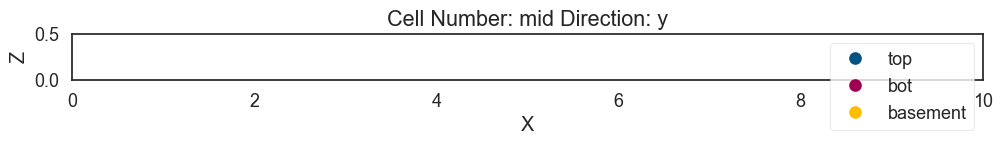

In [10]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [11]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [12]:
gp.set_interpolator(geo_model, compile_theano=True, theano_optimizer='fast_compile',)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.150972
$C_o$             4.767857
drift equations     [3, 3]


In [13]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')